In [63]:
from skimage.io import imread,imsave, imshow
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import os
from skimage import img_as_ubyte

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.metrics import accuracy_score as acc

from math import sqrt
import numpy as np

import pandas as pd

In [27]:
def media(elements):
  return sum(elements)/256

def variancia(elements):
  m = media(elements)
  var = 0
  for i in range(0,256):
    var += ((elements[i] - m)**2)
  return (var / 256)

def mediana(elements):
  elements.sort()
  return abs((elements[256//2] + elements[256//2-1])/2)

def alpha(elements):
  med = media(elements)
  a = 0 
  for i in range(0, 256):
    a += ((elements[i]-med)**2) 
  a = sqrt(a/256)
  return a

def sk(elements):
  me = media(elements)
  ma = mediana(elements)
  a = alpha(elements)
  return (ma * (me - ma))/a
def kur(elements):
  k = 0
  a = alpha(elements)
  m = media(elements)
  for i in range(0,256):
    k += ((elements[i] - m)**4)
  k = ((k/256-1)/(a**4))
  return k
def ener(elements):
  return sum(elements)
def entr(elements):
  propab=[np.size(elements[elements==i])/(1.0*256) for i in elements]
  ent=-np.sum([p*np.log2(1.0/p) for p in propab])
  return ent

In [97]:
def classification(X,y):

    """
    X é uma matriz onde cada linha corresponde aos atributos calculados com o descritor
    y são os rótulos da classe de cada imagem. Exemplo [0,1,0,0,1,2,2,0,0,0,...,1]
    """
    
    # separar conjuntos de treino e teste
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)
    # criar instancia do classificador
    clf = mlp()
    # treinar o classificador
    clf.fit(X_train,y_train)
    # realizar a predicao
    pred = clf.predict(X_test)
    # calcular o resultado utilizando a acuracia
    acuracia = acc(y_test,pred)
    
    return acuracia

In [51]:
def descritor_histograma(imagem):
#   l,c = imagem.shape
#   in_pixel = [] # intensidade do pixel
#   hist = [] # armazena o histograma
#   for i in range(0, 256):
#     in_pixel.append(i)
#     c_pixel = 0 #conta a quantidade de pixels 
#     for j in range(l):
#       for k in range(c):
#        if i == int(imagem[j,k]):
#         c_pixel += 1
#     hist.append(c_pixel)
#   hist = (in_pixel, hist)
  hist = np.histogram(imagem, bins=256)[0]
  elements = hist
  return [media(elements),variancia(elements), sk(elements), kur(elements),ener(elements), entr(elements)]

#     calcula histograma
#     calcular atributos
   # return [media,var,sk,kur,ener,entr]

In [57]:
classe = 'glaucoma' #altere para a classe desejada

path = "/home/user/Documentos/visão_computacional_2022/RIM-ONE_DL_images/partitioned_by_hospital/test_set/"+classe+'/'
names = os.listdir(path)

images = []

for name in names:
    images.append(imread(path+name))

In [58]:
gray_images = []

for image in images:
    gray_images.append(rgb2gray(image))

In [59]:

X = []
i=1
for image in gray_images:
    X.append(descritor_histograma(image)) #ALTERAR AQUI PARA DESCRITOR
    i += 1
for j in X:
    print(j)

[941.72265625, 1067676.3644866943, 212.91297962812536, 3.2082156376085194, 241081, -18.65626362471205]
[659.84765625, 280713.24632263184, 98.46569733623744, 2.1597496979502497, 168921, -10.476212046117954]
[749.390625, 569044.7536621094, 186.10229291629364, 3.928544728245152, 191844, -9.909738857819743]
[780.50390625, 276221.7109222412, 116.53050494374553, 2.2554370521627956, 199809, -8.975528662084022]
[980.47265625, 466821.84300231934, 144.54186454721668, 4.261622967984682, 251001, -8.788028662084022]
[427.97265625, 218293.63597106934, 88.95906864739216, 8.79064470104976, 109561, -10.230239648336088]
[1028.00390625, 721615.5585784912, 236.84852794044662, 4.439434806716483, 263169, -8.591682324168044]
[708.890625, 400621.1599121094, 178.82561490516264, 2.6466055112177362, 181476, -9.582835986252066]
[1134.84765625, 1570084.5041351318, 256.8488094828394, 4.363526369020087, 290521, -10.038712046117954]
[656.640625, 329495.9177246094, 169.60034242537773, 4.05506744633964, 168100, -9.4354

In [71]:
X_glaucoma = X.copy()

In [56]:
X_normal = X.copy() 

In [72]:
X_glaucoma[0]

[941.72265625,
 1067676.3644866943,
 212.91297962812536,
 3.2082156376085194,
 241081,
 -18.65626362471205]

In [77]:
df = pd.DataFrame([X_glaucoma[0]], columns=['media', 'variancia', 'skewness', 'Kurtosis', 'energia', 'entropia'])

In [75]:
df

,media,variancia,skewness,Kurtosis,energia,entropia
0,941.722656,1.067676e+06,212.91298,3.208216,241081,-18.656264


In [79]:
for i in range(1,len(X_glaucoma)):
    df1 = pd.DataFrame([X_glaucoma[i]], columns=['media', 'variancia', 'skewness', 'Kurtosis', 'energia', 'entropia'])
    df.append(df1)

In [83]:
X_glaucoma[1]

[659.84765625,
 280713.24632263184,
 98.46569733623744,
 2.1597496979502497,
 168921,
 -10.476212046117954]

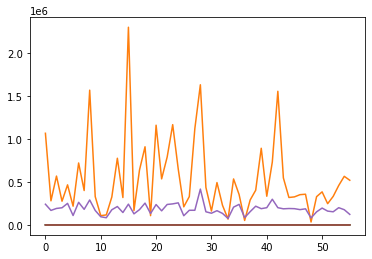

In [91]:
plt.plot(X_glaucoma)

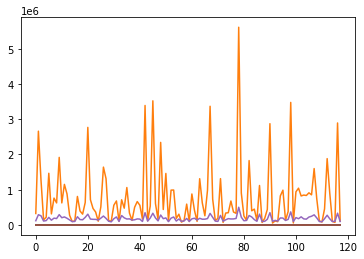

In [87]:
plt.plot(X_normal)

In [92]:
X_glaucoma

[[941.72265625,
  1067676.3644866943,
  212.91297962812536,
  3.2082156376085194,
  241081,
  -18.65626362471205],
 [659.84765625,
  280713.24632263184,
  98.46569733623744,
  2.1597496979502497,
  168921,
  -10.476212046117954],
 [749.390625,
  569044.7536621094,
  186.10229291629364,
  3.928544728245152,
  191844,
  -9.909738857819743],
 [780.50390625,
  276221.7109222412,
  116.53050494374553,
  2.2554370521627956,
  199809,
  -8.975528662084022],
 [980.47265625,
  466821.84300231934,
  144.54186454721668,
  4.261622967984682,
  251001,
  -8.788028662084022],
 [427.97265625,
  218293.63597106934,
  88.95906864739216,
  8.79064470104976,
  109561,
  -10.230239648336088],
 [1028.00390625,
  721615.5585784912,
  236.84852794044662,
  4.439434806716483,
  263169,
  -8.591682324168044],
 [708.890625,
  400621.1599121094,
  178.82561490516264,
  2.6466055112177362,
  181476,
  -9.582835986252066],
 [1134.84765625,
  1570084.5041351318,
  256.8488094828394,
  4.363526369020087,
  290521,
 

In [93]:
X_normal

[[462.25,
  324276.375,
  92.69865645823971,
  5.944492098404559,
  118336,
  -10.673296181987787],
 [1130.640625,
  2661438.7458496094,
  166.9488353436102,
  5.587468963950699,
  289444,
  -15.702966519262691],
 [1012.03515625,
  1271968.057357788,
  208.52576998396268,
  7.461583958680294,
  259081,
  -9.0],
 [427.97265625,
  140048.26097106934,
  116.94383589860713,
  2.1639647893154237,
  109561,
  -10.433364648336088],
 [478.515625,
  218657.85131835938,
  111.41230848682994,
  4.498776907061815,
  122500,
  -10.167739648336088],
 [833.765625,
  1465791.8825683594,
  100.65318535659523,
  7.142026834046767,
  213444,
  -10.207835986252066],
 [523.265625,
  312451.4685058594,
  116.15444341266074,
  3.489353851444935,
  133956,
  -10.0836815336517],
 [749.390625,
  761205.3708496094,
  155.87943919119067,
  4.768918822818665,
  191844,
  -11.803743887799646],
 [705.56640625,
  624312.16746521,
  131.3719381736172,
  3.8915656306182917,
  180625,
  -10.237018310420108],
 [1139.0625

In [95]:
y = []
for i in range(len(X_glaucoma)):
    y.append(1)

In [98]:
acc= classification(X_glaucoma,y)

In [99]:
acc

1.0

In [100]:
y1 = []
for i in range(len(X_normal)):
    y1.append(0)

In [108]:
X_glaucoma.append(X_normal)

In [109]:
y.append(y1)

In [110]:
acc= classification(X_glaucoma,y)

ValueError: setting an array element with a sequence.

In [105]:
X_total